# <span style='font-family:"Times New Roman"'> <span styel=''> Cohort Analysis 

The project is completed as a part of DataCamp Customer analytics series. 
    
In this project, the transaction dataset is broken down into groups based on the transaction date. The customer lifecycle starts from the date of the first transaction. We created month-wise groups based on the transaction date and first transaction. Then, we assign a group index to each transaction to visualize the group as a heat-map to understand when customers churn the most. Finally, we correlate the event that leads to churn and customer behavior.

In [28]:
# Import libraries necessary for this project

import pandas as pd
import numpy as np
from datetime import datetime as dt

In [29]:
# Libraries Data Visualization 

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
# Data import from dataset folder

customer = pd.read_csv('./dataset/online.csv')

customer.head()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,416792,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom
1,482904,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom
2,263743,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14 13:35:00,3.75,13933,United Kingdom
3,495549,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23 15:53:00,2.10,17290,United Kingdom
4,204384,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25 13:36:00,5.95,17663,United Kingdom


In [31]:
# Basic info of data

customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70864 entries, 0 to 70863
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   70864 non-null  int64  
 1   InvoiceNo    70864 non-null  int64  
 2   StockCode    70864 non-null  object 
 3   Description  70864 non-null  object 
 4   Quantity     70864 non-null  int64  
 5   InvoiceDate  70864 non-null  object 
 6   UnitPrice    70864 non-null  float64
 7   CustomerID   70864 non-null  int64  
 8   Country      70864 non-null  object 
dtypes: float64(1), int64(4), object(4)
memory usage: 4.9+ MB


## <span style='font-family:"Times New Roman"'> <span styel=''> Data Preprocessing 
    1. check for null values and data types
    2. convert data types 

In [32]:
customer.isnull().sum()

Unnamed: 0     0
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [33]:
# check data type of date

print(type(customer.loc[0,'InvoiceDate']))

<class 'str'>


In [34]:
# convert data type to datetime object


customer['InvoiceDate']=pd.to_datetime(customer['InvoiceDate'])

customer['InvoiceDay'] = customer['InvoiceDate'].apply(lambda x: dt(x.year, x.month, x.day))

## Feature Engineering

Create order price using unit price and quantity

In [35]:
customer['OrderPrice'] = customer['Quantity'] * customer['UnitPrice']

## Time cohort of unique customers
1. First transaction date of each customer
2. Cohort index: Customer wise difference between first transaction date and other transaction dates
3. Cohort date: Dates of all transactions of a month to 1st of that month
4. Count unique customer for each month

In [36]:
# First transaction date of each customer 


grouping = customer.groupby('CustomerID')['InvoiceDay']

customer['CohortMonth'] = grouping.transform(min)

In [37]:
customer.head()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDay,OrderPrice,CohortMonth
0,416792,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom,2011-10-25,12.60,2011-04-11
1,482904,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom,2011-11-20,1.45,2011-09-12
2,263743,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14 13:35:00,3.75,13933,United Kingdom,2011-07-14,22.50,2011-07-14
3,495549,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23 15:53:00,2.10,17290,United Kingdom,2011-11-23,2.10,2011-11-23
4,204384,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25 13:36:00,5.95,17663,United Kingdom,2011-05-25,17.85,2011-02-25


In [38]:
def get_date_int(df, column):
    """
    get day, month and year from data column
    
    Parameters
    ----------
    df: DataFrame
        Dataframe with date column 
    column: str
        Name of the date column
    
    Returns:
    -------
    year: pandas series
        year values extracted from date column
    month: pandas series
        month values extracted from date column
    day: pandas series
        day values extracted from date column
    
    """
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day

In [39]:
Invoice_year, Invoice_month, Invoice_day = get_date_int(customer, 'InvoiceDay')

Cohort_year, Cohort_month, Cohort_day = get_date_int(customer, 'CohortMonth')

In [40]:
# Assign group index to each transaction 

customer['CohortIndex'] = (np.floor(((Invoice_year - Cohort_year) * 365 + (Invoice_month - Cohort_month) * 30 + (Invoice_day - Cohort_day) )/30) + 1).astype(int)

In [41]:
customer['CohortIndex'].unique()

array([ 7,  3,  1,  4, 10,  6,  2, 11,  8,  5, 13, 12,  9])

In [42]:
# assign 1st date of month to all transaction of that month

customer['CohortDay'] = customer['CohortMonth'].apply(lambda x: dt(x.year, x.month, 1))

In [43]:
# check the result

#value = dt.strptime('2011-04-01', '%Y-%m-%d')

#customer.loc[customer['CohortDay']==value][['CustomerID', 'CohortIndex', 'InvoiceDay']]

In [44]:
# Count the unique customer belong to CohortDate and CohortIndex

grouping = customer.groupby(['CohortDay', 'CohortIndex'])

cohort_data = grouping['CustomerID'].apply(pd.Series.nunique)

cohort_data = cohort_data.reset_index()

In [45]:
# check the result

# print(cohort_data)

In [46]:
# Pivot Table showing number of unique customers of a CohortDate and CohortIndex 

cohort_counts = cohort_data.pivot(index='CohortDay',columns='CohortIndex', values='CustomerID')

In [47]:
print(cohort_counts)

CohortIndex     1      2      3      4      5      6      7      8      9   \
CohortDay                                                                    
2010-12-01   716.0  252.0  231.0  248.0  245.0  281.0  254.0  234.0  235.0   
2011-01-01   332.0   75.0   94.0  101.0   87.0   89.0   87.0   93.0  105.0   
2011-02-01   316.0   70.0   69.0   87.0   62.0   82.0   82.0   73.0   96.0   
2011-03-01   388.0   72.0   95.0   81.0   75.0   76.0   92.0   98.0   84.0   
2011-04-01   255.0   57.0   42.0   55.0   42.0   52.0   64.0   47.0    5.0   
2011-05-01   249.0   42.0   38.0   45.0   57.0   60.0   55.0    3.0    NaN   
2011-06-01   207.0   29.0   34.0   36.0   54.0   50.0    4.0    NaN    NaN   
2011-07-01   173.0   24.0   35.0   39.0   38.0    NaN    NaN    NaN    NaN   
2011-08-01   139.0   29.0   38.0   25.0    1.0    NaN    NaN    NaN    NaN   
2011-09-01   279.0   72.0   68.0    3.0    NaN    NaN    NaN    NaN    NaN   
2011-10-01   318.0   55.0    3.0    NaN    NaN    NaN    NaN    

In [48]:
# Customer Retention
# Percentage of customers w.r.t initial count of customers

cohort_col = cohort_counts.iloc[:,0]

cohort_counts = cohort_counts.divide(cohort_col, axis=0)*100

cohort_counts = cohort_counts.round(3)/100

In [49]:
# Check result

# print(cohort_counts)

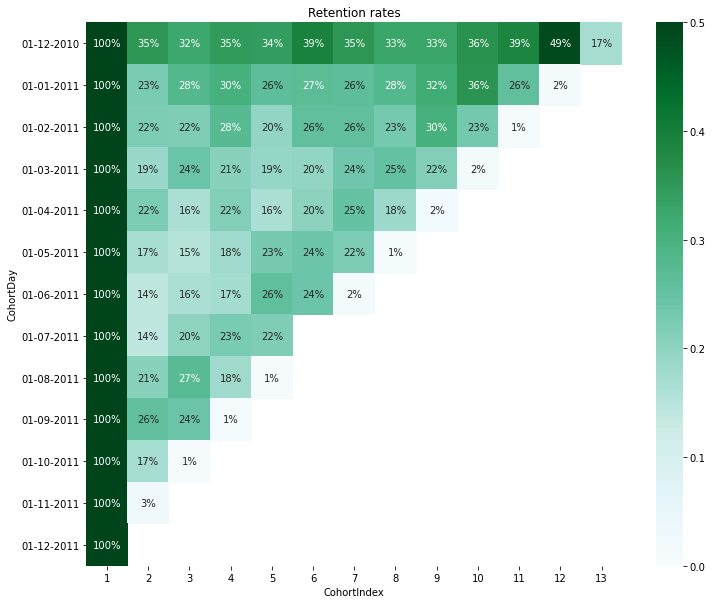

In [50]:
# visualize customer retention over the month

plt.figure(figsize=(12, 10))
plt.title('Retention rates')
ax = sns.heatmap(data = cohort_counts,
annot = True,
fmt = '.0%',
vmin = 0.0,
vmax = 0.5,
cmap = 'BuGn')
ax.set_yticklabels(cohort_counts.index.strftime('%d-%m-%Y'))
plt.show()

### Observations

The majority of customers leave after the end of 1st month. 

## Time cohort of total order price

The total order price change over the months. 

In [51]:
# Total order price 

cohort_data_order_price = grouping['OrderPrice'].sum()

cohort_data_order_price = cohort_data_order_price.reset_index()

cohort_order_price = cohort_data_order_price.pivot(index='CohortDay',columns='CohortIndex', values='OrderPrice')

In [52]:
# Customer order price
# Percentage change in total order value in months  

cohort_col = cohort_order_price.iloc[:,0]

cohort_data_order_prices = cohort_order_price.divide(cohort_col, axis=0)*100

cohort_order_prices = cohort_data_order_prices.round(3)/100

In [53]:
print(cohort_order_prices)

CohortIndex   1        2        3        4        5        6        7   \
CohortDay                                                                
2010-12-01   1.0  0.30889  0.31335  0.32776  0.32522  0.46481  0.37706   
2011-01-01   1.0  0.15546  0.23033  0.34889  0.36212  0.29473  0.28755   
2011-02-01   1.0  0.23178  0.19434  0.31137  0.30449  0.29330  0.36632   
2011-03-01   1.0  0.20780  0.25773  0.21340  0.20172  0.20589  0.25632   
2011-04-01   1.0  0.19017  0.21718  0.19896  0.15863  0.19362  0.26851   
2011-05-01   1.0  0.14108  0.14961  0.15246  0.21164  0.20423  0.21804   
2011-06-01   1.0  0.24081  0.21720  0.21931  0.32264  0.31120  0.01123   
2011-07-01   1.0  0.13062  0.18960  0.25174  0.18595      NaN      NaN   
2011-08-01   1.0  0.29599  0.71026  0.15580  0.00089      NaN      NaN   
2011-09-01   1.0  0.21723  0.18907  0.00810      NaN      NaN      NaN   
2011-10-01   1.0  0.16526  0.00417      NaN      NaN      NaN      NaN   
2011-11-01   1.0  0.01108      NaN    

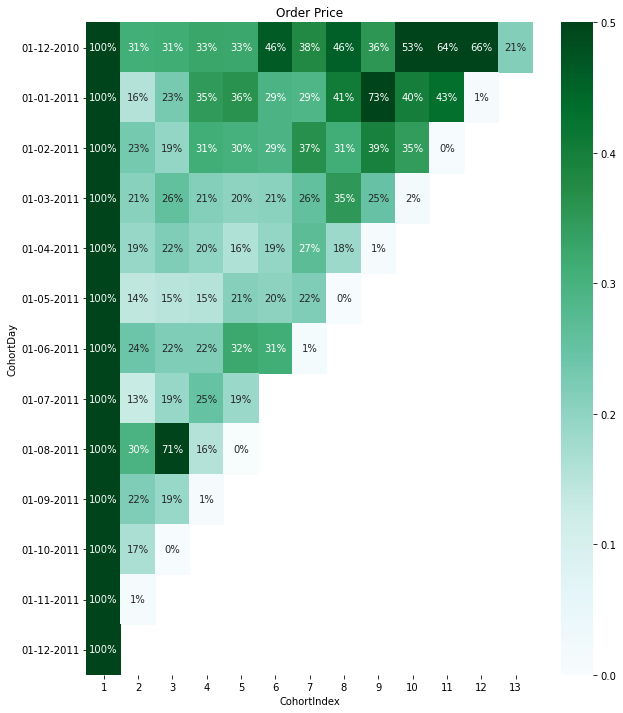

In [54]:
# visualize customer retention over the month

plt.figure(figsize=(10, 12))
plt.title('Order Price')
ax = sns.heatmap(data = cohort_order_prices,
annot = True,
fmt = '.0%',
vmin = 0.0,
vmax = 0.5,
cmap = 'BuGn')
ax.set_yticklabels(cohort_counts.index.strftime('%d-%m-%Y'))
plt.show()